## DataWrangling

DataWrangling step consists of multiple components including Data Collection, Data Organization, Data Definition, and Data Cleaning.  

### Data Collection

In [3]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
os.getcwd()

'/Users/HOME/Desktop/Springboard/TED-Talks'

In [7]:
ted_main = pd.read_csv("/Users/HOME/Desktop/Springboard/TED-Talks/ted_main.csv")
ted_transcript = pd.read_csv("/Users/HOME/Desktop/Springboard/TED-Talks/transcripts.csv")

In [8]:
ted_main.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110  
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520  
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292  
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550  
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869

In [9]:
ted_transcript.head()

transcript  \
0  Good morning. How are you?(Laughter)It's been ...   
1  Thank you so much, Chris. And it's truly a gre...   
2  (Music: "The Sound of Silence," Simon & Garfun...   
3  If you're here today — and I'm very happy that...   
4  About 10 years ago, I took on the task to teac...   

                                                 url  
0  https://www.ted.com/talks/ken_robinson_says_sc...  
1  https://www.ted.com/talks/al_gore_on_averting_...  
2  https://www.ted.com/talks/david_pogue_says_sim...  
3  https://www.ted.com/talks/majora_carter_s_tale...  
4  https://www.ted.com/talks/hans_rosling_shows_t...

In [10]:
ted_main.shape,ted_transcript.shape

((2550, 17), (2467, 2))

In [11]:
ted_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

In [12]:
ted_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   transcript  2467 non-null   object
 1   url         2467 non-null   object
dtypes: object(2)
memory usage: 38.7+ KB


In [53]:
#merging the two data sets
ted_talks = ted_main.merge(ted_transcript, on = ('url'),how = "left")
ted_talks.head()

comments                                        description  duration  \
0      4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1       265  With the same humor and humanity he exuded in ...       977   
2       124  New York Times columnist David Pogue takes aim...      1286   
3       200  In an emotionally charged talk, MacArthur-winn...      1116   
4       593  You've never seen data presented like this. Wi...      1190   

     event   film_date  languages   main_speaker  \
0  TED2006  1140825600         60   Ken Robinson   
1  TED2006  1140825600         43        Al Gore   
2  TED2006  1140739200         26    David Pogue   
3  TED2006  1140912000         35  Majora Carter   
4  TED2006  1140566400         48   Hans Rosling   

                                            name  num_speaker  published_date  \
0      Ken Robinson: Do schools kill creativity?            1      1151367060   
1           Al Gore: Averting the climate crisis            1      1151367060   
2                  David Pogue: Simplicity sells            1      1151367060   
3             Majora Carter: Greening the ghetto            1      1151367060   
4  Hans Rosling: The best stats you've ever seen            1      1151440680   

                                             ratings  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
1  [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
2  [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...   
3  [{'id': 3, 'name': 'Courageous', 'count': 760}...   
4  [{'id': 9, 'name': 'Ingenious', 'count': 3202}...   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
1  [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
2  [{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...   
3  [{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...   
4  [{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...   

                     speaker_occupation  \
0                       Author/educator   
1                      Climate advocate   
2                  Technology columnist   
3    Activist for environmental justice   
4  Global health expert; data visionary   

                                                tags  \
0  ['children', 'creativity', 'culture', 'dance',...   
1  ['alternative energy', 'cars', 'climate change...   
2  ['computers', 'entertainment', 'interface desi...   
3  ['MacArthur grant', 'activism', 'business', 'c...   
4  ['Africa', 'Asia', 'Google', 'demo', 'economic...   

                             title  \
0      Do schools kill creativity?   
1      Averting the climate crisis   
2                 Simplicity sells   
3              Greening the ghetto   
4  The best stats you've ever seen   

                                                 url     views  \
0  https://www.ted.com/talks/ken_robinson_says_sc...  47227110   
1  https://www.ted.com/talks/al_gore_on_averting_...   3200520   
2  https://www.ted.com/talks/david_pogue_says_sim...   1636292   
3  https://www.ted.com/talks/majora_carter_s_tale...   1697550   
4  https://www.ted.com/talks/hans_rosling_shows_t...  12005869   

                                          transcript  
0  Good morning. How are you?(Laughter)It's been ...  
1  Thank you so much, Chris. And it's truly a gre...  
2  (Music: "The Sound of Silence," Simon & Garfun...  
3  If you're here today — and I'm very happy that...  
4  About 10 years ago, I took on the task to teac...

In [37]:
ted_talks.shape

(2553, 18)

In [34]:
ted_talks.isnull().values.any()

True

In [35]:
ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2553 entries, 0 to 2552
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2553 non-null   int64 
 1   description         2553 non-null   object
 2   duration            2553 non-null   int64 
 3   event               2553 non-null   object
 4   film_date           2553 non-null   int64 
 5   languages           2553 non-null   int64 
 6   main_speaker        2553 non-null   object
 7   name                2553 non-null   object
 8   num_speaker         2553 non-null   int64 
 9   published_date      2553 non-null   int64 
 10  ratings             2553 non-null   object
 11  related_talks       2553 non-null   object
 12  speaker_occupation  2547 non-null   object
 13  tags                2553 non-null   object
 14  title               2553 non-null   object
 15  url                 2553 non-null   object
 16  views               2553

In [24]:
ted_talks.isnull().sum()

comments               0
description            0
duration               0
event                  0
film_date              0
languages              0
main_speaker           0
name                   0
num_speaker            0
published_date         0
ratings                0
related_talks          0
speaker_occupation     6
tags                   0
title                  0
url                    0
views                  0
transcript            86
dtype: int64

In [31]:
ted_talks[ted_talks['transcript'].isnull()]

comments                                        description  duration  \
58         222  Two Pilobolus dancers perform "Symbiosis." Doe...       825   
115         27  The avant-garde string quartet Ethel performs ...       214   
135         36  After Vusi Mahlasela's 3-song set at TEDGlobal...       299   
209         67  Rokia Traore sings the moving "M'Bifo," accomp...       419   
237         43  Singer-songwriter Rokia Traore performs "Kouna...       386   
...        ...                                                ...       ...   
1430       229  Kid President commands you to wake up, listen ...       208   
1470       183  As we move through the world, we have an innat...       388   
1489       126  What color is a mirror? How much does a video ...       441   
2410         5  Grammy-winning Silk Road Ensemble display thei...       389   
2421        11  Sō Percussion creates adventurous compositions...       609   

               event   film_date  languages            main_speaker  \
58           TED2005  1109289600          0               Pilobolus   
115          TED2006  1138838400          0                   Ethel   
135   TEDGlobal 2007  1181260800          0          Vusi Mahlasela   
209   TEDGlobal 2007  1181088000          0            Rokia Traore   
237   TEDGlobal 2007  1181088000          0            Rokia Traore   
...              ...         ...        ...                     ...   
1430     SoulPancake  1358985600          0           Kid President   
1470   TEDYouth 2012  1353110400          0  Katherine Kuchenbecker   
1489          TED-Ed  1362009600          0         Michael Stevens   
2410         TED2016  1455494400          0      Silk Road Ensemble   
2421         TED2016  1455494400          0           Sō Percussion   

                                                 name  num_speaker  \
58                  Pilobolus: A dance of "Symbiosis"            1   
115         Ethel: A string quartet plays "Blue Room"            1   
135                            Vusi Mahlasela: "Woza"            1   
209                            Rokia Traore: "M'Bifo"            1   
237                          Rokia Traore: "Kounandi"            1   
...                                               ...          ...   
1430    Kid President: I think we all need a pep talk            1   
1470  Katherine Kuchenbecker: The technology of touch            1   
1489    Michael Stevens: How much does a video weigh?            1   
2410                  Silk Road Ensemble: "Turceasca"            1   
2421      Sō Percussion: "Music for Wood and Strings"            1   

      published_date                                            ratings  \
58        1170979860  [{'id': 1, 'name': 'Beautiful', 'count': 1810}...   
115       1182184140  [{'id': 1, 'name': 'Beautiful', 'count': 216},...   
135       1187695440  [{'id': 8, 'name': 'Informative', 'count': 4},...   
209       1206580680  [{'id': 23, 'name': 'Jaw-dropping', 'count': 5...   
237       1212627600  [{'id': 22, 'name': 'Fascinating', 'count': 84...   
...              ...                                                ...   
1430      1359734822  [{'id': 10, 'name': 'Inspiring', 'count': 771}...   
1470      1364569190  [{'id': 9, 'name': 'Ingenious', 'count': 150},...   
1489      1366815569  [{'id': 22, 'name': 'Fascinating', 'count': 17...   
2410      1489759215  [{'id': 1, 'name': 'Beautiful', 'count': 80}, ...   
2421      1490963646  [{'id': 21, 'name': 'Unconvincing', 'count': 8...   

                                          related_talks   speaker_occupation  \
58    [{'id': 40, 'hero': 'https://pe.tedcdn.com/ima...        Dance company   
115   [{'id': 103, 'hero': 'https://pe.tedcdn.com/im...       String quartet   
135   [{'id': 158, 'hero': 'https://pe.tedcdn.com/im...   Musician, activist   
209   [{'id': 265, 'hero': 'https://pe.tedcdn.com/im...    Singer-songwriter   
237   [{'id': 186, 'hero': 'https://pe.tedcdn.com/im...    Sin

### DataOrganization

In [38]:
#creating subfolders in the project directory
directory = ["Data",'Figures','Models','Notebooks','Reports']
parent_dir = '/Users/HOME/Desktop/Springboard/TED-Talks' 
for i in directory:
    path = os.path.join(parent_dir, i)
    os.makedirs(path) 
    print("Directory '% s' created" % i) 


FileExistsError: [Errno 17] File exists: '/Users/HOME/Desktop/Springboard/TED-Talks/Data'

In [39]:
os.listdir()

['.DS_Store',
 'ted_main.csv',
 'transcripts.csv',
 'DataWrangling & EDA.ipynb',
 'Models',
 'transcripts.csv.zip',
 'Figures',
 '.ipynb_checkpoints',
 'Data',
 'Notebooks',
 'ted_main.csv.zip',
 'Reports']

### Data Definition

In this step,we will review the column names,data types and null values.

##### Description of columns

| Column | Description |
| ------ | ----------- |
| name | The official name of the TED Talk. Includes the title and the speaker |
| title | The title of the talk |
| description | A blurb of what the talk is about |
| main_speaker | The first named speaker of the talk |
| speaker_occupation | The occupation of the main speaker |
| num_speaker | The number of speakers in the talk |
| duration | The duration of the talk in seconds |
| event | The TED/TEDx event where the talk took place |
| film_date | The Unix timestamp of the filming |
| published_date | The Unix timestamp for the publication of the talk on TED.com |
| comments | The number of first level comments made on the talk |
| tags | The themes associated with the talk |
| languages | The number of languages in which the talk is available |
| ratings | A stringified dictionary of the various ratings given to the talk (inspiring, fascinating, jaw dropping, etc.) |
| related_talks | A list of dictionaries of recommended talks to watch next |
| url | The URL of the talk |
| views | The number of views on the talk |



In [55]:
#changing the columns order for convenience
ted_talks = ted_talks[['name','title','description','main_speaker','speaker_occupation','transcript','duration','film_date',
                       'published_date','languages','num_speaker','event','comments','ratings','views','tags','related_talks','url']]

In [80]:
#Checking the datatypes
ted_talks.dtypes

name                   object
title                  object
description            object
main_speaker           object
speaker_occupation     object
transcript             object
duration              float64
film_date              object
published_date         object
languages               int64
num_speaker             int64
event                  object
comments                int64
ratings                object
views                   int64
tags                   object
related_talks          object
url                    object
dtype: object

In [66]:
#changing the timestamp to date format
ted_talks['film_date'] = ted_talks['film_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))
ted_talks['published_date'] = ted_talks['published_date'].apply(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'))

In [78]:
#changing from seconds to minutes
ted_talks['duration'] = ted_talks['duration']/60

In [81]:
#count of unique values for every column, regardless of data type
ted_talks.nunique()

name                  2550
title                 2550
description           2550
main_speaker          2156
speaker_occupation    1458
transcript            2464
duration              1083
film_date              731
published_date        2344
languages               66
num_speaker              5
event                  355
comments               559
ratings               2550
views                 2550
tags                  2530
related_talks         2550
url                   2550
dtype: int64

In [83]:
# percent of unique values per column
ted_talks.nunique()/ted_talks.size

name                  0.055490
title                 0.055490
description           0.055490
main_speaker          0.046916
speaker_occupation    0.031727
transcript            0.053619
duration              0.023567
film_date             0.015907
published_date        0.051008
languages             0.001436
num_speaker           0.000109
event                 0.007725
comments              0.012164
ratings               0.055490
views                 0.055490
tags                  0.055055
related_talks         0.055490
url                   0.055490
dtype: float64

In [108]:
#Checking the categorical columns
ted_talks.select_dtypes(include = 'object').columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'transcript', 'film_date', 'published_date', 'event', 'ratings', 'tags',
       'related_talks', 'url'],
      dtype='object')

In [101]:
# Checking the unique codes
#When working with categorical columns, it's really helpful to know what the unique codes are
ted_talks['name'].value_counts()

Jonathan Haidt: Religion, evolution, and the ecstasy of self-transcendence    2
Rob Reid: The $8 billion iPod                                                 2
Brené Brown: Listening to shame                                               2
Amos Winter: The cheap all-terrain wheelchair                                 1
Jessica Green: We're covered in germs. Let's design for that.                 1
                                                                             ..
Silk Road Ensemble: "Turceasca"                                               1
Alyssa Monks: How loss helped one artist find beauty in imperfection          1
Carolyn Jones: A tribute to nurses                                            1
Kwame Anthony Appiah: Is religion good or bad? (This is a trick question)     1
Rob Hopkins: Transition to a world without oil                                1
Name: name, Length: 2550, dtype: int64

In [102]:
ted_talks['title'].value_counts()

Listening to shame                                               2
The $8 billion iPod                                              2
Religion, evolution, and the ecstasy of self-transcendence       2
Let's go all-in on selling sustainability                        1
How architectural innovations migrate across borders             1
                                                                ..
Simplifying complexity                                           1
An 8-dimensional model of the universe                           1
My son was a Columbine shooter. This is my story                 1
A tale of two Americas. And the mini-mart where they collided    1
Meet the SixthSense interaction                                  1
Name: title, Length: 2550, dtype: int64

In [109]:
ted_talks['description'].value_counts()

Comic author Rob Reid unveils Copyright Math (TM), a remarkable new field of study based on actual numbers from entertainment industry lawyers and lobbyists.                                                                                                                                                                                                                                                                                              2
Psychologist Jonathan Haidt asks a simple, but difficult question: why do we search for self-transcendence? Why do we attempt to lose ourselves? In a tour through the science of evolution by group selection, he proposes a provocative answer.                                                                                                                                                                                                          2
Shame is an unspoken epidemic, the secret behind many forms of broken behavior. Brené Brown, whose earlier tal

In [110]:
ted_talks['main_speaker'].value_counts()

Hans Rosling          9
Juan Enriquez         7
Marco Tempest         6
Rives                 6
Jonathan Haidt        5
                     ..
Hyeonseo Lee          1
Quyen Nguyen          1
Mike Velings          1
Michael Botticelli    1
Francis Collins       1
Name: main_speaker, Length: 2156, dtype: int64

In [111]:
ted_talks['speaker_occupation'].value_counts()

Writer                 45
Designer               34
Artist                 34
Journalist             33
Entrepreneur           31
                       ..
Surgeon, journalist     1
Toymaker                1
CEO of Google           1
Border specialist       1
Medical futurist        1
Name: speaker_occupation, Length: 1458, dtype: int64

In [112]:
ted_talks['transcript'].value_counts()

The recent debate over copyright laws like SOPA in the United States and the ACTA agreement in Europe has been very emotional. And I think some dispassionate, quantitative reasoning could really bring a great deal to the debate. I'd therefore like to propose that we employ, we enlist, the cutting edge field of copyright math whenever we approach this subject.For instance, just recently the Motion Picture Association revealed that our economy loses 58 billion dollars a year to copyright theft. Now rather than just argue about this number, a copyright mathematician will analyze it and he'll soon discover that this money could stretch from this auditorium all the way across Ocean Boulevard to the Westin, and then to Mars ... (Laughter) ... if we use pennies.Now this is obviously a powerful, some might say dangerously powerful, insight. But it's also a morally important one. Because this isn't just the hypothetical retail value of some pirated movies that we're talking about, but this is a

In [114]:
ted_talks['event'].value_counts()

TED2014                   84
TED2009                   83
TED2013                   77
TED2016                   77
TED2015                   75
                          ..
TEDxVirginiaTech           1
TEDxAmericanRiviera        1
TEDxLinnaeusUniversity     1
TEDxSussexUniversity       1
TEDxDesMoines              1
Name: event, Length: 355, dtype: int64

In [115]:
ted_talks['ratings'].value_counts()

[{'id': 7, 'name': 'Funny', 'count': 1396}, {'id': 25, 'name': 'OK', 'count': 64}, {'id': 8, 'name': 'Informative', 'count': 568}, {'id': 24, 'name': 'Persuasive', 'count': 340}, {'id': 22, 'name': 'Fascinating', 'count': 157}, {'id': 23, 'name': 'Jaw-dropping', 'count': 137}, {'id': 10, 'name': 'Inspiring', 'count': 65}, {'id': 3, 'name': 'Courageous', 'count': 80}, {'id': 9, 'name': 'Ingenious', 'count': 325}, {'id': 21, 'name': 'Unconvincing', 'count': 64}, {'id': 26, 'name': 'Obnoxious', 'count': 36}, {'id': 2, 'name': 'Confusing', 'count': 31}, {'id': 1, 'name': 'Beautiful', 'count': 30}, {'id': 11, 'name': 'Longwinded', 'count': 9}]           2
[{'id': 21, 'name': 'Unconvincing', 'count': 201}, {'id': 11, 'name': 'Longwinded', 'count': 60}, {'id': 26, 'name': 'Obnoxious', 'count': 76}, {'id': 8, 'name': 'Informative', 'count': 257}, {'id': 24, 'name': 'Persuasive', 'count': 280}, {'id': 10, 'name': 'Inspiring', 'count': 464}, {'id': 22, 'name': 'Fascinating', 'count': 333}, {'id'

In [116]:
ted_talks['tags'].value_counts()

['art', 'creativity']                                                                                                                                                                                                                                                                                                           3
['entertainment', 'live music', 'music', 'performance']                                                                                                                                                                                                                                                                         3
['live music', 'music', 'performance']                                                                                                                                                                                                                                                                                          3
['business', 'technology']        

In [117]:
ted_talks['related_talks'].value_counts()

[{'id': 1042, 'hero': 'https://pe.tedcdn.com/images/ted/3820be698584de25ea375c0bf57ee620caf94b8d_1600x1200.jpg', 'speaker': 'Brené Brown', 'title': 'The power of vulnerability', 'duration': 1219, 'slug': 'brene_brown_on_vulnerability', 'viewed_count': 31168571}, {'id': 1043, 'hero': 'https://pe.tedcdn.com/images/ted/096b5ffc6f219b59eda79ae79cba25cd24bf2863_2880x1620.jpg', 'speaker': 'Barry Schwartz', 'title': 'Using our practical wisdom', 'duration': 1387, 'slug': 'barry_schwartz_using_our_practical_wisdom', 'viewed_count': 948633}, {'id': 1193, 'hero': 'https://pe.tedcdn.com/images/ted/74e74754c9ee8e8e901a22d87de798f3d1ce74b3_1600x1200.jpg', 'speaker': 'Thandie Newton', 'title': 'Embracing otherness, embracing myself', 'duration': 835, 'slug': 'thandie_newton_embracing_otherness_embracing_myself', 'viewed_count': 2462745}, {'id': 2678, 'hero': 'https://pe.tedcdn.com/images/ted/698bb104dda80250739b46f02190f74526ba2ed4_2880x1620.jpg', 'speaker': 'Thordis Elva and Tom Stranger', 'title':

In [118]:
ted_talks['url'].value_counts()

https://www.ted.com/talks/jonathan_haidt_humanity_s_stairway_to_self_transcendence\n               2
https://www.ted.com/talks/rob_reid_the_8_billion_ipod\n                                            2
https://www.ted.com/talks/brene_brown_listening_to_shame\n                                         2
https://www.ted.com/talks/lee_smolin_on_science_and_democracy\n                                    1
https://www.ted.com/talks/dorothy_roberts_the_problem_with_race_based_medicine\n                   1
                                                                                                  ..
https://www.ted.com/talks/chetan_bhatt_dare_to_refuse_the_origin_myths_that_claim_who_you_are\n    1
https://www.ted.com/talks/jason_decaires_taylor_an_underwater_art_museum_teeming_with_life\n       1
https://www.ted.com/talks/lisa_genova_what_you_can_do_to_prevent_alzheimer_s\n                     1
https://www.ted.com/talks/thomas_suarez_a_12_year_old_app_developer\n                      

From the above unique values, we got to know that there might be some duplicates.Lets check for the duplicates

In [106]:
#Checking the duplicates
ted_talks[ted_talks.duplicated()]

name  \
1176  Jonathan Haidt: Religion, evolution, and the e...   
1178                      Rob Reid: The $8 billion iPod   
1180                    Brené Brown: Listening to shame   

                                                  title  \
1176  Religion, evolution, and the ecstasy of self-t...   
1178                                The $8 billion iPod   
1180                                 Listening to shame   

                                            description    main_speaker  \
1176  Psychologist Jonathan Haidt asks a simple, but...  Jonathan Haidt   
1178  Comic author Rob Reid unveils Copyright Math (...        Rob Reid   
1180  Shame is an unspoken epidemic, the secret behi...     Brené Brown   

            speaker_occupation  \
1176       Social psychologist   
1178      Author, entrepreneur   
1180  Vulnerability researcher   

                                             transcript   duration  \
1176  I have a question for you: Are you religious? ...  18.266667   
1178  The recent debate over copyright laws like SOP...   5.183333   
1180  I'm going to tell you a little bit about my TE...  20.633333   

       film_date published_date  languages  num_speaker    event  comments  \
1176  2012-02-28     2012-03-14         31            1  TED2012       497   
1178  2012-02-29     2012-03-15         44            1  TED2012       241   
1180  2012-03-01     2012-03-16         38            1  TED2012       707   

                                                ratings    views  \
1176  [{'id': 21, 'name': 'Unconvincing', 'count': 2...  1129577   
1178  [{'id': 7, 'name': 'Funny', 'count': 1396}, {'...  2598055   
1180  [{'id': 9, 'name': 'Ingenious', 'count': 577},...  7988894   

                                                   tags  \
1176  ['culture', 'evolution', 'evolutionary psychol...   
1178  ['business', 'comedy', 'entertainment', 'humor...   
1180         ['brain', 'culture', 'psychology', 'self']   

                                          related_talks  \
1176  [{'id': 1327, 'hero': 'https://pe.tedcdn.com/i...   
1178  [{'id': 187, 'hero': 'https://pe.tedcdn.com/im...   
1180  [{'id': 1042, 'hero': 'https://pe.tedcdn.com/i...   

                                                    url  
1176  https://www.ted.com/talks/jonathan_haidt_human...  
1178  https://www.ted.com/talks/rob_reid_the_8_billi...  
1180  https://www.ted.com/talks/brene_brown_listenin...

In [126]:
#Dropping the duplicate rows
ted_talks.drop_duplicates(inplace = True)

In [135]:
#Range of values per column
ted_talks.agg([min,max]).T

min  \
name               AJ Jacobs: How healthy living nearly killed me   
title                        Hidden miracles of the natural world   
description     "A forest is much more than what you see," say...   
main_speaker                                                OK Go   
duration                                                     2.25   
film_date                                              1972-05-13   
published_date                                         2006-06-26   
languages                                                       0   
num_speaker                                                     1   
event                                               AORN Congress   
comments                                                        2   
ratings         [{'id': 1, 'name': 'Beautiful', 'count': 100},...   
views                                                       50443   
tags            ["Alzheimer's", 'TED Fellows', 'aging', 'brain...   
related_talks   [{'id': 1, 'hero': 'https://pe.tedcdn.com/imag...   
url             https://www.ted.com/talks/9_11_healing_the_mot...   

                                                              max  
name                       iO Tillett Wright: Fifty shades of gay  
title                            “Am I dying?” The honest answer.  
description     “People are so afraid of variety that they try...  
main_speaker                                    iO Tillett Wright  
duration                                                     87.6  
film_date                                              2017-08-26  
published_date                                         2017-09-22  
languages                                                      72  
num_speaker                                                     5  
event                                      World Science Festival  
comments                                                     6404  
ratings         [{'id': 9, 'name': 'Ingenious', 'count': 986},...  
views                                                    47227110  
tags                             ['technology', 'transportation']  
related_talks   [{'id': 998, 'hero': 'https://pe.tedcdn.com/im...  
url             https://www.ted.com/talks/zubaida_bai_a_simple...

In [141]:
#Review the numeric dataset's summary statistics
ted_talks.describe()

duration    languages  num_speaker     comments         views
count  2550.000000  2550.000000  2550.000000  2550.000000  2.550000e+03
mean     13.775170    27.326275     1.028235   191.562353  1.698297e+06
std       6.233486     9.563452     0.207705   282.315223  2.498479e+06
min       2.250000     0.000000     1.000000     2.000000  5.044300e+04
25%       9.616667    23.000000     1.000000    63.000000  7.557928e+05
50%      14.133333    28.000000     1.000000   118.000000  1.124524e+06
75%      17.445833    33.000000     1.000000   221.750000  1.700760e+06
max      87.600000    72.000000     5.000000  6404.000000  4.722711e+07

In [142]:
#checking the null values
ted_talks.isnull().any()

name                  False
title                 False
description           False
main_speaker          False
speaker_occupation     True
transcript             True
duration              False
film_date             False
published_date        False
languages             False
num_speaker           False
event                 False
comments              False
ratings               False
views                 False
tags                  False
related_talks         False
url                   False
dtype: bool

In [143]:
ted_talks.isnull().sum()

name                   0
title                  0
description            0
main_speaker           0
speaker_occupation     6
transcript            86
duration               0
film_date              0
published_date         0
languages              0
num_speaker            0
event                  0
comments               0
ratings                0
views                  0
tags                   0
related_talks          0
url                    0
dtype: int64

In [151]:
ted_talks[ted_talks['speaker_occupation'].isnull()]

name  \
1113               Sonaar Luthra: Meet the Water Canary   
1195                      Rick Falkvinge: I am a pirate   
1223          Gary Kovacs: Tracking our online trackers   
1659  Ryan Holladay: To hear this music you have to ...   
1914             Brian Dettmer: Old books reborn as art   
1952          Boniface Mwangi: The day I stood up alone   

                                                  title  \
1113                              Meet the Water Canary   
1195                                      I am a pirate   
1223                       Tracking our online trackers   
1659  To hear this music you have to be there. Liter...   
1914                            Old books reborn as art   
1952                           The day I stood up alone   

                                            description     main_speaker  \
1113  After a crisis, how can we tell if water is sa...    Sonaar Luthra   
1195  The Pirate Party fights for transparency, anon...   Rick Falkvinge   
1223  As you surf the Web, information is being coll...      Gary Kovacs   
1659  In this lovely talk, TED Fellow Ryan Holladay ...    Ryan Holladay   
1914  What do you do with an outdated encyclopedia i...    Brian Dettmer   
1952  Photographer Boniface Mwangi wanted to protest...  Boniface Mwangi   

     speaker_occupation                                         transcript  \
1113                NaN  Cholera was reported in Haiti for the first ti...   
1195                NaN  Thank y'all!This is going to be a motivational...   
1223                NaN  I don't know why, but I'm continually amazed t...   
1659                NaN  (Music) For any of you who have visited or liv...   
1914                NaN  I'm an artist and I cut books. This is one of ...   
1952                NaN  People back home call me a heckler, a troublem...   

       duration   film_date published_date  languages  num_speaker  \
1113   3.616667  2011-07-13     2012-01-16         38            1   
1195  18.283333  2012-03-10     2012-04-01         10            1   
1223   6.650000  2012-02-28     2012-05-03         32            1   
1659   6.483333  2013-10-29     2014-01-10         33            1   
1914   6.100000  2014-11-03     2015-02-06         34            1   
1952   7.333333  2014-10-19     2015-04-02         33            1   

                      event  comments  \
1113         TEDGlobal 2011       145   
1195           TEDxObserver       122   
1223                TED2012       257   
1659  TED@BCG San Francisco       140   
1914          TEDYouth 2014        48   
1952         TEDGlobal 2014        70   

                                                ratings    views  \
1113  [{'id': 10, 'name': 'Inspiring', 'count': 73},...   353749   
1195  [{'id': 8, 'name': 'Informative', 'count': 156...   181010   
1223  [{'id': 23, 'name': 'Jaw-dropping', 'count': 9...  2098639   
1659  [{'id': 1, 'name': 'Beautiful', 'count': 211},...  1284510   
1914  [{'id': 1, 'name': 'Beautiful', 'count': 361},...  1159937   
1952  [{'id': 3, 'name': 'Courageous', 'count': 614}...  1342431   

                                                   tags  \
1113  ['TED Fellows', 'design', 'global development'...   
1195  ['Internet', 'TEDx', 'global issues', 'politic...   
1223  ['Internet', 'advertising', 'business', 'priva...   
1659  ['TED Fellows', 'entertainment', 'music', 'tec...   
1914         ['TEDYouth', 'art', 'books', 'creativity']   
1952  ['TED Fellows', 'activism', 'art', 'corruption...   

                                          related_talks  \
1113  [{'id': 523, 'hero': 'https://pe.tedcdn.com/im...   
1195  [{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...   
1223  [{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...   
1659  [{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...   
1914  [{'id': 610, 'hero': 'https://pe.tedcdn.com/im...   
1952  [{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...   

                                                    url  
1

### DataCleaning

In [152]:
#printing the percent of each feature that is missing
nas = pd.DataFrame(ted_talks.isnull().sum().sort_values(ascending = False)/len(ted_talks),columns = ['percent'])
pos = nas['percent'] > 0 
nas[pos]

percent
transcript          0.033725
speaker_occupation  0.002353

##### Handling the missing and NA values

In [154]:
ted_talks['speaker_occupation'].fillna('UNKNOWN',inplace = True)

In [160]:
ted_talks['transcript'].fillna('',inplace = True)

0       Good morning. How are you?(Laughter)It's been ...
1       Thank you so much, Chris. And it's truly a gre...
2       (Music: "The Sound of Silence," Simon & Garfun...
3       If you're here today — and I'm very happy that...
4       About 10 years ago, I took on the task to teac...
                              ...                        
2548    So, Ma was trying to explain something to me a...
2549    This is a picture of a sunset on Mars taken by...
2550    In my early days as a graduate student, I went...
2551    I took a cell phone and accidentally made myse...
2552    We humans are becoming an urban species, so ci...
Name: transcript, Length: 2550, dtype: object

In [165]:
ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 2552
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                2550 non-null   object 
 1   title               2550 non-null   object 
 2   description         2550 non-null   object 
 3   main_speaker        2550 non-null   object 
 4   speaker_occupation  2550 non-null   object 
 5   transcript          2464 non-null   object 
 6   duration            2550 non-null   float64
 7   film_date           2550 non-null   object 
 8   published_date      2550 non-null   object 
 9   languages           2550 non-null   int64  
 10  num_speaker         2550 non-null   int64  
 11  event               2550 non-null   object 
 12  comments            2550 non-null   int64  
 13  ratings             2550 non-null   object 
 14  views               2550 non-null   int64  
 15  tags                2550 non-null   object 
 16  relate

In [163]:
#generating panads profiling report
import pandas_profiling
report = ted_talks.profile_report(sort='None', html={'style':{'full_width': True}}, progress_bar=False)
report

### EXPLORATORY DATA ANALYSIS

#### Building data profile tabels and plots

In [166]:
ted_talks.describe()

duration    languages  num_speaker     comments         views
count  2550.000000  2550.000000  2550.000000  2550.000000  2.550000e+03
mean     13.775170    27.326275     1.028235   191.562353  1.698297e+06
std       6.233486     9.563452     0.207705   282.315223  2.498479e+06
min       2.250000     0.000000     1.000000     2.000000  5.044300e+04
25%       9.616667    23.000000     1.000000    63.000000  7.557928e+05
50%      14.133333    28.000000     1.000000   118.000000  1.124524e+06
75%      17.445833    33.000000     1.000000   221.750000  1.700760e+06
max      87.600000    72.000000     5.000000  6404.000000  4.722711e+07

Histograms are an excellent way to review the range and density of values for each numeric features in the data set. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f925e999890>,
      dtype=object)

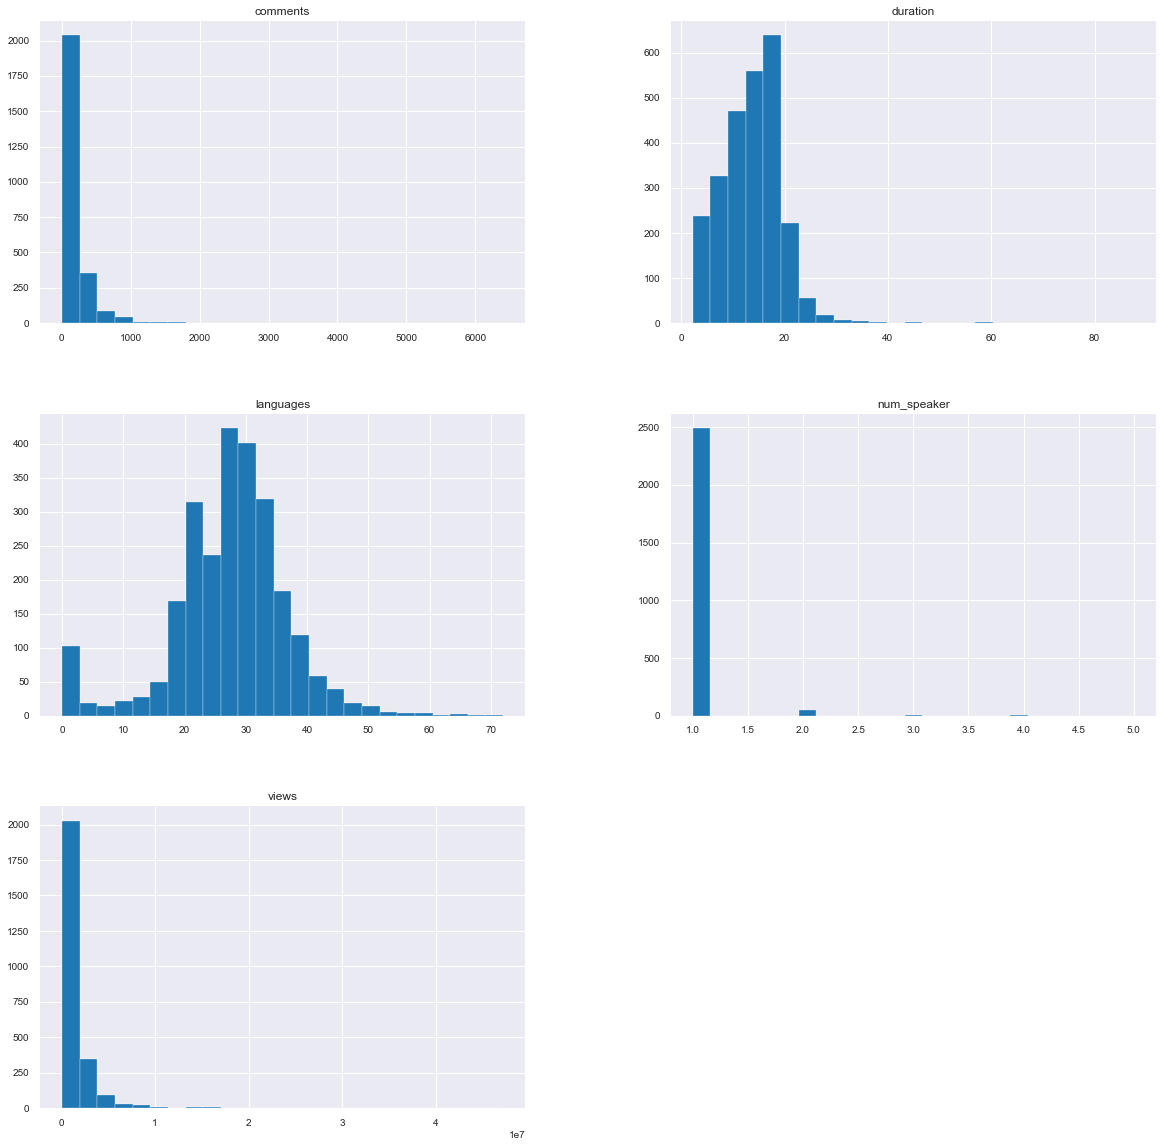

In [169]:
sns.set_style('darkgrid')
ted_talks.hist(bins = 25,figsize=(20,20))

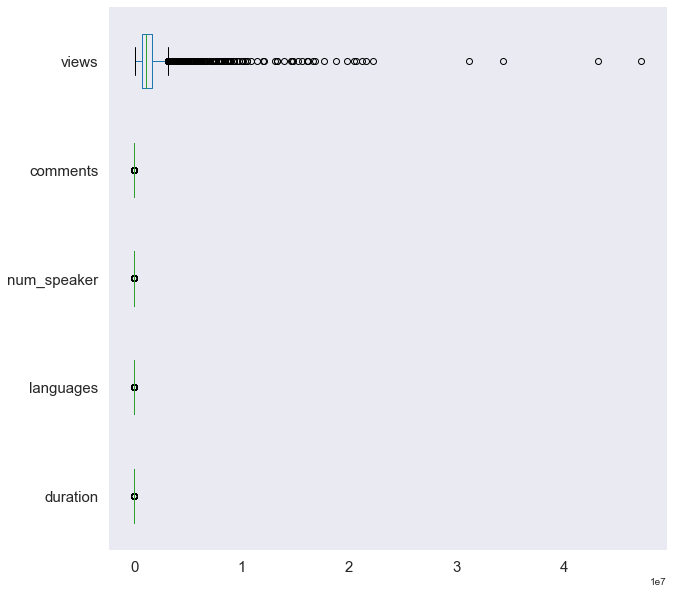

In [172]:
#Anamolies & Outliers - Review boxplots
ted_talks.boxplot(vert = False,grid = False,fontsize  =15,figsize = (10,10))

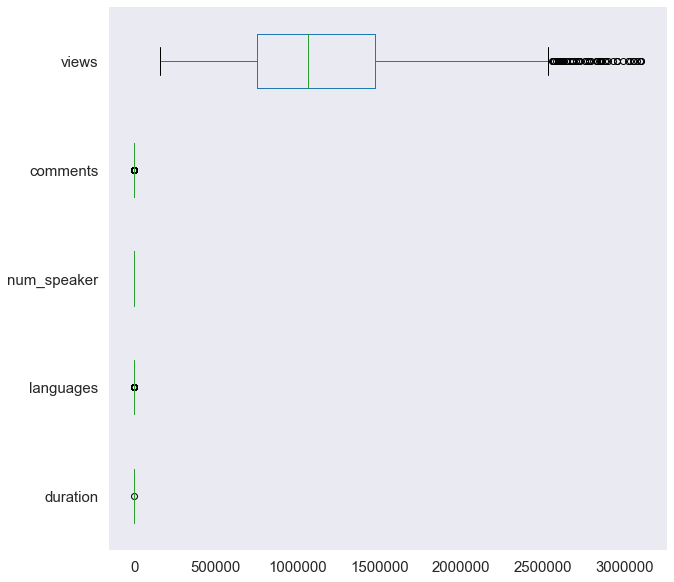

In [173]:
# Let's get the Interquartile range, or IQR. This is equal to Q3 - Q1. 
# First, let's use the quantile() method to get the first quartile, and store it in a variable called Q1.
# We'll want to plug 0.25 into the quantile method. 
Q1 = ted_talks.quantile(0.25)

# Now get Q3 and store in a variable called Q3. 
Q3 = ted_talks.quantile(0.75)

# Now calculate the IQR, storing it in a variable called IQR.b
IQR = Q3 - Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
dfno = ted_talks[~((ted_talks < (Q1 - 1.5 * IQR)) |(ted_talks > (Q3 + 1.5 * IQR))).any(axis=1)]

# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 

# We now want to make a boxplot of this new dataframe dfno. 
boxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(10,10))




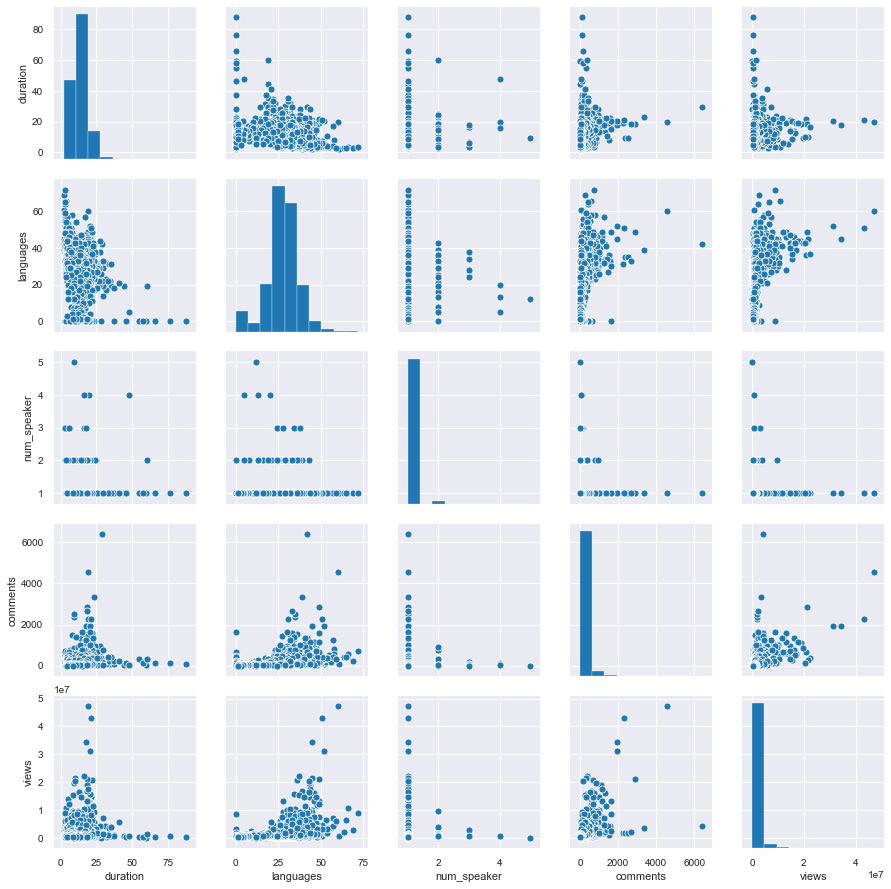

In [175]:
#Explore data relationships
sns.pairplot(ted_talks)

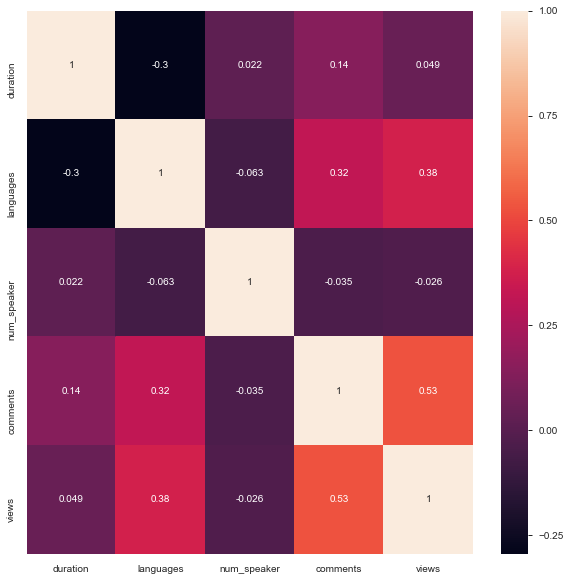

In [177]:
#Heat map - Correlation between features
plt.figure(figsize = (10,10))
sns.heatmap(ted_talks.corr(),annot = True)

In [178]:
ted_talks.columns

Index(['name', 'title', 'description', 'main_speaker', 'speaker_occupation',
       'transcript', 'duration', 'film_date', 'published_date', 'languages',
       'num_speaker', 'event', 'comments', 'ratings', 'views', 'tags',
       'related_talks', 'url'],
      dtype='object')

In [189]:
#Now lets create some features from the existing columns
ted_talks['film_year'] = pd.to_datetime(ted_talks['film_date']).dt.year
ted_talks['film_month'] = pd.to_datetime(ted_talks['film_date']).dt.month_name()
ted_talks['film_day'] = pd.to_datetime(ted_talks['film_date']).dt.day_name()

Now lets do exploratory data analysis on ted_talks.First we will check the most viewd talks of all time.

### Most Viewed talks of all time

First we will see investigate the distribution of views and their summary statistics 

In [210]:
#Summary Statistics of views
ted_talks['views'].describe()

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

**Summary statistics** shows that the average number of views on TED Talks is 1.6 million. And the median number of views is 1.12 million. We also can notice that the maximum number of views on TED Talks are aroud 47.2 million. This proves the popularity of TED Talks.

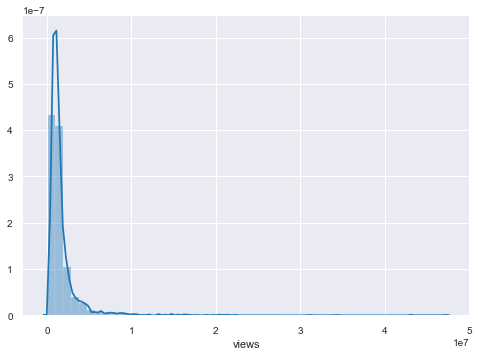

In [211]:
#plot the distibution
sns.distplot(ted_talks['views'])

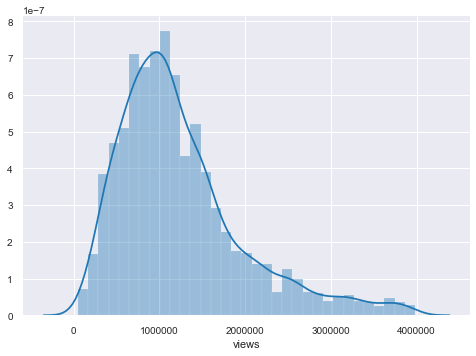

In [222]:
#Lets consider the maximum nuber of views on TED Talks as cutoff point and plot the distribution 
sns.distplot(ted_talks[ted_talks['views'] < 0.4e7]['views'])

Text(0, 0.5, 'Talks')

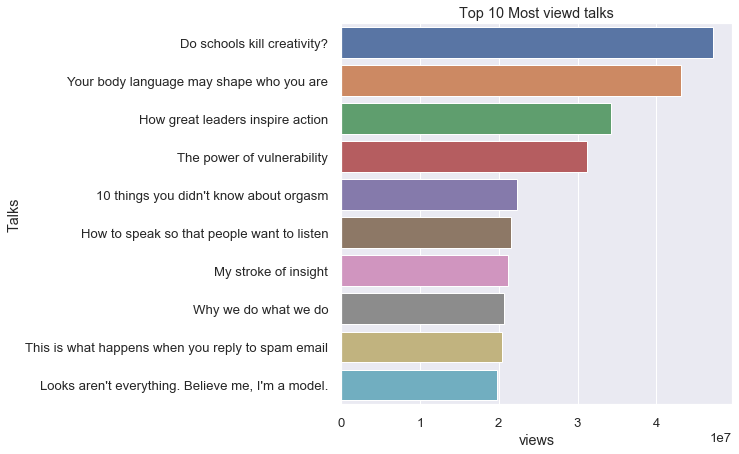

In [247]:
#Plot the top 10 most viewd talks
most_viewed = ted_talks[['title','main_speaker','views','speaker_occupation','film_date']].sort_values(by = 'views',ascending = False).head(10)
plt.figure(figsize = (7,7))
sns.set(font_scale = 1.2)
sns.barplot(y = 'title', x = 'views',data = most_viewed)
plt.title("Top 10 Most viewd talks")
plt.ylabel('Talks')


#### Summary findings:

- The Talk **Do schools kill creativity?** is the most viewed talks of all times with more than 40 million views followed   by **Your body language may shape who you are?**.
- Only the two talks Do schools kill creativity?,  Your body language may shape who you are? surpassed the 40 million mark.
    
    
    

Now let's make a barchart visualize the speaker of these most viewd Talks along with their view count.

Text(0.5, 1.0, 'Speakers of Top 10 Most viewd talks')

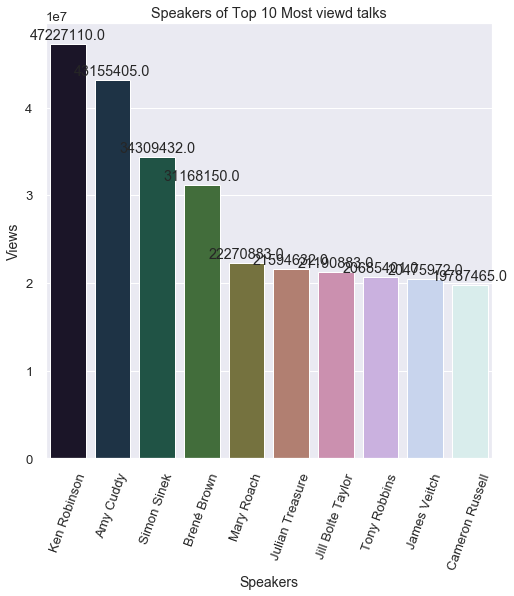

In [252]:
#Most viewd talks speakers and their view count 

f, ax = plt.subplots(figsize=(8,8))
splot = sns.barplot(x = 'main_speaker', y = 'views', data = most_viewed,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Speakers", size=14)
plt.ylabel("Views", size=14)
plt.xticks(rotation = 70)
ax.set_title("Speakers of Top 10 Most viewd talks")


#### Summary findings:

- **Ken Robinson**'s talk on Do schools kill creativity? is the most viewed talks of all times with 47227110  views followed by **Amy Cuddy**'s talk on Your body language may shape who you are? with 43155405 views.

    

Now we will analyze briefly about the TED Speakers who have insprired millions of people with their talks and their occupation.

### TED Speakers

In this section we are going to analyze which speaker has given the most number of TED Talks, that is who is most popular speaker with respect to the number of Talks.

Text(0.5, 1, 'TOP 10 Speakers with their number of talks')

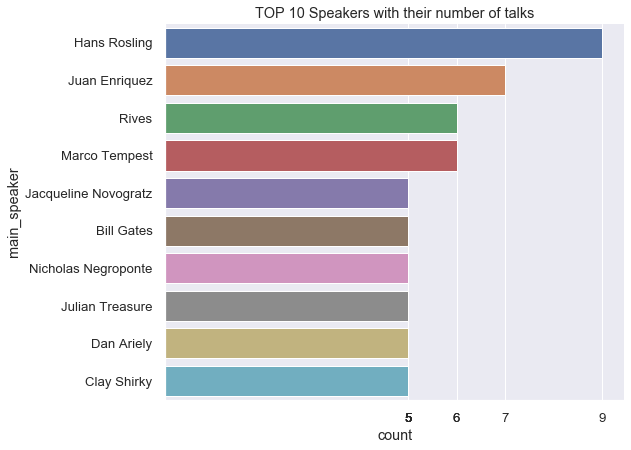

In [288]:
#TOP 10 Speakers with their number of talks 
sns.catplot(y = 'main_speaker', kind = 'count',data = ted_talks,height=6, aspect=1.5,
            order = ted_talks.main_speaker.value_counts().iloc[:10].index)
plt.xticks(ted_talks.main_speaker.value_counts().iloc[:10].values)
plt.title("TOP 10 Speakers with their number of talks")

Summery Findings:

- **Hans Rosling** is the most popular TED Speaker with 9 talks on the TED platform followed by **Juan Enriquez** with 7 talks.

Now we will check the speakers occupations to get to know what kind of people TED is inviting to its event.

#### Speakers Occupation

Text(0.5, 1, 'Top 10 occupations of TED speakers')

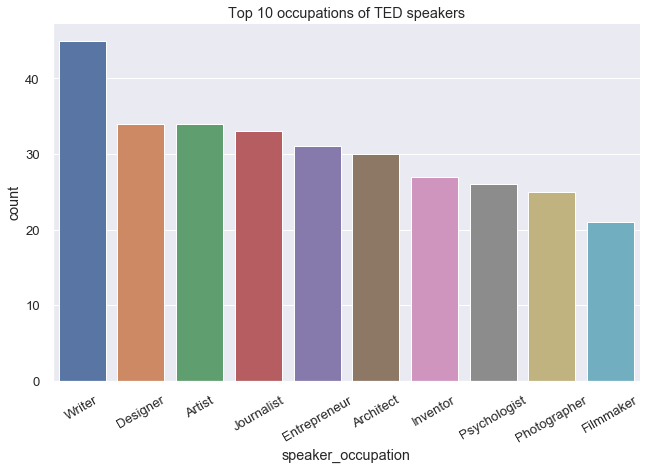

In [299]:
#Top 10 occupations of speakers
sns.catplot(x = 'speaker_occupation', kind = 'count', data = ted_talks,height = 6,aspect = 1.5,
           order = ted_talks.speaker_occupation.value_counts().iloc[:10].index)
plt.xticks(rotation = 30)
plt.title("Top 10 occupations of TED speakers")

Summery Findings:

- **Writers** are the most popular that TED is intrested in inviting to its events.
- **Designers** , **Artists** are the second popular with more than 30 speakers in each category.

Now we will analyze which occupation tend to gather more views and try to figure it out **is there any relationship between speaker_occupation and the views?**  

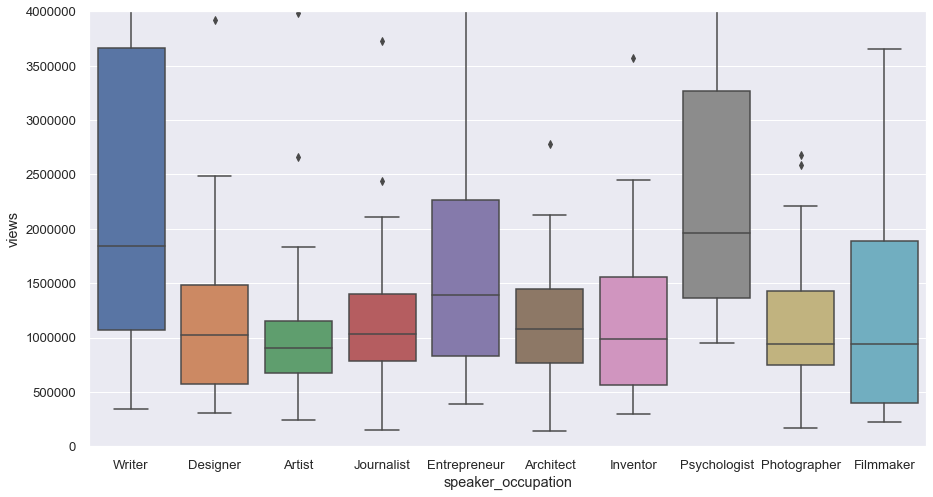

In [312]:
#Number of views with respect to occupation
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x ='speaker_occupation', y ='views', 
            data = ted_talks,order = ted_talks.speaker_occupation.value_counts().iloc[:10].index)
ax.set_ylim([0, 0.4e7])
plt.show()


Observation:

On an average **Psychologist** occupation tend to accumulate more views out of top 10 most popular occupations.

Now lets make hypothesis about the relationship between views and speakers_occupation.

#### HYPOTHESIS

- **Null Hypothesis(H0)** - There is no significant difference among different occupation groups.
- **Alternate Hypothesis(Ha)** - There is a significant difference among different occupation groups.

For this we are going to perform **ANOVA** test.

- ANOVA is used when we want to compare the means of a condition between more than two groups.
- ANOVA tests if there is a difference in the mean somewhere in the model (testing if there was an overall effect).

There are 3 types of ANOVA test.Here we are going to use One-Way ANOVA(A one-way ANOVA has just one independent variable).There are 2 ways to perform One-Way ANOVA.

- 1.One-Way ANOVA Test using statsmodels module
- 2.One-Way ANOVA Test using OLS Model

Here we are going to use **One-Way ANOVA Test using OLS Model**.


In [309]:
#One-Way ANOVA Test using OLS Model
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('views ~ C(speaker_occupation)', ted_talks).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                    0.8588
Date:                Sat, 14 Nov 2020   Prob (F-statistic):              0.997
Time:                        22:53:18   Log-Likelihood:                -40208.
No. Observations:                2550   AIC:                         8.333e+04
Df Residuals:                    1091   BIC:                         9.186e+04
Df Model:                        1458                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================================================================
                                                                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                          4.332e+05   2.61e+06      0.166      0.868   -4.68e+06    5.55e+06
C(speaker_occupation)[T. Child protection leader, activist, author ]                               2.229e+05   3.69e+06      0.060      0.952   -7.01e+06    7.45e+06
C(speaker_occupation)[T. Robotics engineer]                                                       -5.755e+04   3.69e+06     -0.016      0.988   -7.29e+06    7.17e+06
C(speaker_occupation)[T. Space physicist]                                                          1.033e+06   3.69e+06      0.280      0.779    -6.2e+06    8.26e+06
C(speaker_occupation)[T.3D printer]                                                                2.093e+06   3.69e+06      0.568      0.570   -5.14e+06    9.32e+06
C(speaker_occupation)[T.3D printing entrepreneur]                                                  1.162e+06   3.69e+06      0.315      0.753   -6.07e+06    8.39e+06
C(speaker_occupation)[T.9/11 mothers]                                                              3.878e+05   3.69e+06      0.105      0.916   -6.84e+06    7.62e+06
C(speaker_occupation)[T.A capella ensemble]                                                        1.052e+06   3.69e+06      0.285      0.775   -6.18e+06    8.28e+06
C(speaker_occupation)[T.AI expert]                                                                  4.96e+05   3.19e+06      0.155      0.877   -5.77e+06    6.76e+06
C(speaker_occupation)[T.AI pioneer]                                                                7.989e+04   3.69e+06      0.022      0.983   -7.15e+06    7.31e+06
C(speaker_occupation)[T.AI product designer]                                                       7.066e+05   3.69e+06      0.192      0.848   -6.52e+06    7.94e+06
C(speaker_occupation)[T.Academic]                                                                  1.076e+06   3.69e+06      0.292      0.770   -6.16e+06    8.31e+06
C(speaker_occupation)[T.Academic, author]                                                           2.17e+06   3.69e+06      0.589      0.556   -5.06e+06     9.4e+06
C(speaker_occupation)[T.Acting and voice coach]                                                   -2.562e+05   3.69e+06     -0.070      0.945   -7.49e+06    6.98e+06
C(speaker_occupation)[T.Activist]                                                                   1.47e+06   2.73e+06      0.538      0.591   -3.89e+06    6.83e+06
C(speaker_occupation)[T.Activist and social entrepreneur]                                      

In [310]:
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

# Creates the ANOVA table
res = sm.stats.anova_lm(model, typ= 2)
res

Overall model F( 1458, 1091) =  0.859, p =  0.9965


sum_sq      df         F    PR(>F)
C(speaker_occupation)  8.502930e+15  1458.0  0.858775  0.996534
Residual               7.408945e+15  1091.0       NaN       NaN

**Summary findings**:

- From the above output results, we see that the p-value is greater than 0.05. Hence, we can accept the Null Hypothesis that there’s no difference among different occupation groups.
- From the above resuls, we concluded that **There is no relationship between views and speakers occupation**.
    

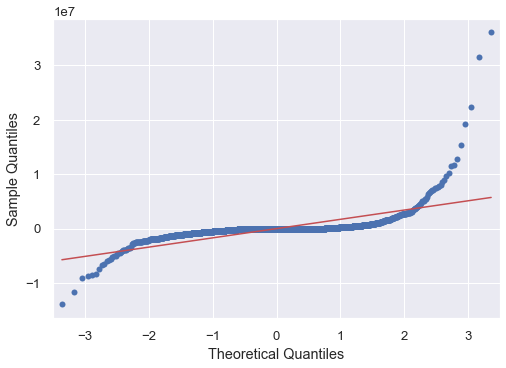

In [314]:
#Check the Normal distribution of residuals
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

From the above Q-Q plot, we can see that residuals are almost normally distributed (although points at the extreme ends can be discounted). Hence, we can conclude that it satisfies the Normality assumption of the ANOVA test.

Now we will analyze the comments on TED-Talks. This dataset has only the number of comments in comments feature instead of text.

### TED Comments

In [316]:
ted_talks['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

Summary Findings:

- Minimum number of comments on a talk is 2 and maximum is 6404.On average, there are 191.56 comments on every talk.
- Here we ca observe the very high starndard deviation because of its outliers.

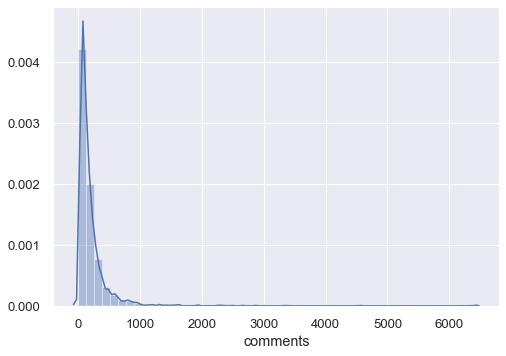

In [318]:
#plot the distribution of comments
sns.distplot(ted_talks['comments'])

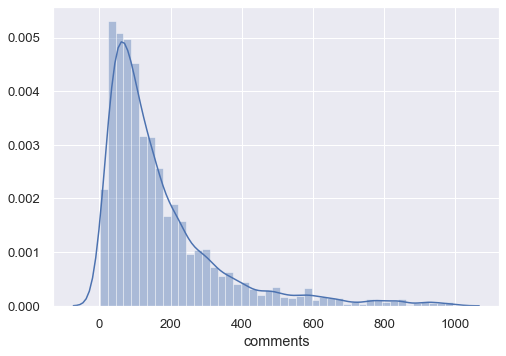

In [321]:
#We can see alot of outliers.Lets take a cutoff point of 1000 for indepth analysis 
sns.distplot(ted_talks[ted_talks.comments < 1000]['comments'])

From the above plot we can see that the mean is highly effected by the outliers.
Now we will analyze the how many comments the talk gathered depends on its views.That is **which talks provoke the most online discussion?**. For that we are going to introduce another column views_per_comment.

### Which talks provoke the most online discussion?

Text(0.5, 1, 'Top 10 talks that provoke online discussion')

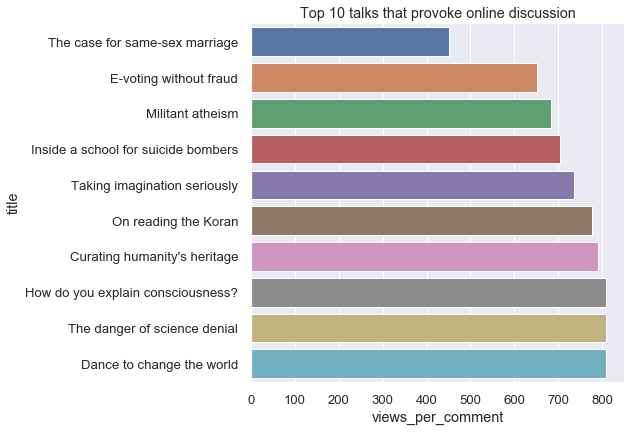

In [336]:
#which Top 10 talks provoke the most online discussion?
ted_talks['views_per_comment'] = ted_talks['views']/ted_talks['comments']
sns.catplot(y = 'title', x = 'views_per_comment', kind = 'bar',height = 6,aspect =1.5,
           data = ted_talks.sort_values(by = 'views_per_comment',ascending = True).head(10))
plt.title("Top 10 talks that provoke online discussion")

Summary Findings:

- **The case for same_sex marriage** is the most hotly debated talk of all time.
- **E-voting without fraud** and **Millitant atheism** are the next discussed talks on TED online platform.

Now we will analyze is there any relationship between views and comments.That is in another words *Are the most viewd talks tend to get more comments?*

Lets make some hypothesis between the number of views and comments.

#### HYPOTHESIS

- **Null Hypothesis(H0)**: There is no relationship between views and comments.
- **Alternate Hypothesis(Ha)**: There is a relationship between views and comments.

For this we are going to find the **pearson correlation** between those two features.

The Pearson Correlation test is used to analyze the strength of a relationship between two provided variables, both quantitative in nature. The value, or strength of the Pearson correlation, will be between +1 and -1.

A correlation of 1 indicates a perfect association between the variables, and the correlation is either positive or negative. Correlation coefficients near 0 indicate very weak, almost non-existent, correlations. While there are other ways of measuring correlations between two variables, such as Spearman Correlation or Kendall Rank Correlation, Pearson correlation is probably the most commonly used correlational test.


#### PEARSON COEFFICIENT STATISTICAL TEST¶

In [348]:
from scipy import stats
stats.pearsonr(ted_talks['views'],ted_talks['comments'])

(0.5309387006213676, 1.8033220870969764e-185)

The above result shows that

correlation = 0.53

p-value = 1.8033220870969764e-185 which is almost 0.

Because p-value is < 0.05 ,we are rejecting null hypothesis.Hence we are accepting that **There is a relationship between views and comments**.

Let's visualize this relationship graphically.

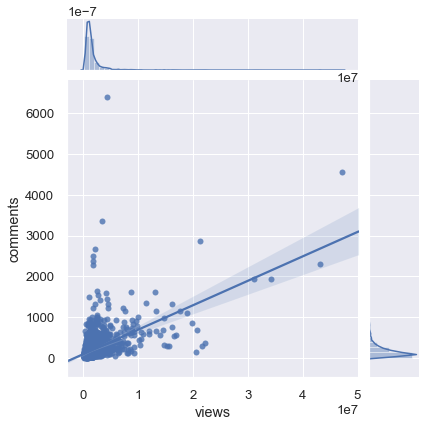

In [341]:
# Relationship between views and comments
sns.jointplot(x = 'views',y  ='comments',data = ted_talks,kind = 'reg')

The above plot shows that there is a medium postive correlation.Now lets analyze the languages that the TED Talks are available.

### TED Languages

In [345]:
ted_talks.languages.describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

Summary findings:
    
- On average,TED Talk is available in 27 languages.The maximum number of languages in which the TED Talk available is 72.

Now we will analyze which TED Talks are accessible in 72 different languages.

In [347]:
ted_talks[ted_talks['languages'] == 72]['views']

973    8838874
Name: views, dtype: int64

In [346]:
ted_talks[ted_talks['languages'] == 72]

name                          title  \
973  Matt Cutts: Try something new for 30 days  Try something new for 30 days   

                                           description main_speaker  \
973  Is there something you've always meant to do, ...   Matt Cutts   

    speaker_occupation                                         transcript  \
973       Technologist  A few years ago, I felt like I was stuck in a ...   

     duration   film_date published_date  languages  ...  comments  \
973      3.45  2011-03-02     2011-07-01         72  ...       736   

                                               ratings    views  \
973  [{'id': 10, 'name': 'Inspiring', 'count': 6171...  8838874   

                       tags  \
973  ['culture', 'success']   

                                         related_talks  \
973  [{'id': 947, 'hero': 'https://pe.tedcdn.com/im...   

                                                   url film_year film_month  \
973  https://www.ted.com/talks/matt_cutts_try_somet...      2011      March   

      film_day views_per_comment  
973  Wednesday      12009.339674  

[1 rows x 22 columns]

Observation tells that the talk **Try something new for 30 days** is accessible in 72 diffrent languages with more than 8 million views.

Now we will find out if there is any correlation between number of views and number of languages a talk is available in.

The correlation between views and languages is: 0.377623052253186


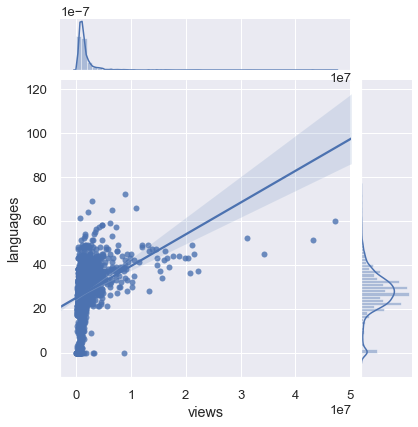

In [352]:
#Relation between number of views and number of languages
sns.jointplot(x = 'views',y  ='languages',data = ted_talks,kind = 'reg')
print("The correlation between views and languages is:",ted_talks['views'].corr(ted_talks['languages']))

Observation tells that there is medium positive correlation between views and languages.

Now lets analyze the TED Talks by year.

### TED Talks by year

Text(0.5, 1.0, 'TED Talks by year')

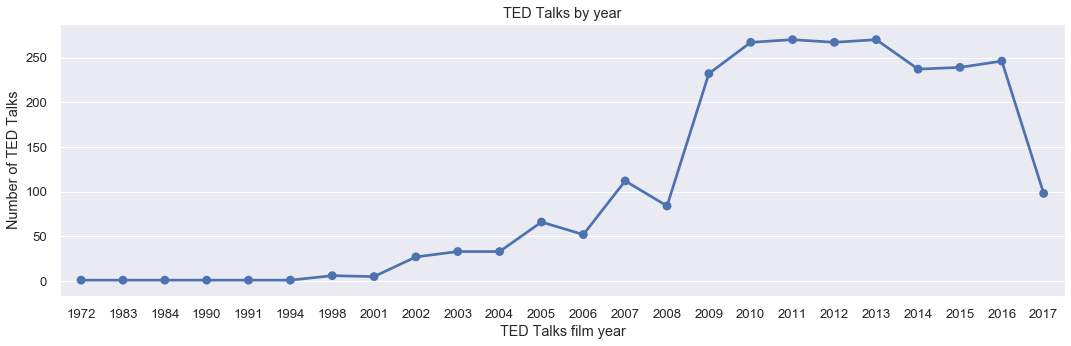

In [364]:
plt.figure(figsize=(18,5))
sns.pointplot(x = ted_talks['film_year'].value_counts().index, y = ted_talks['film_year'].value_counts().values)
plt.xlabel("TED Talks film year")
plt.ylabel("Number of TED Talks")
plt.title("TED Talks by year")

Summary Findings:
    
- Unsurprisingly as expected,the numbet of talks increased gradually over the years.
- There is a very sharp **increase in 2009**.From that year onwards the numbers of talks are consistent.
- But in 2017, there is a sharp decrease in number of talks.
- It might be intresting to know the reason behind sharp increase in 2009 and sharp decrease in 2017.

Now we will analyze the TED Talks by month to get to know which month is most popular for TED conferences.

### TED Talks by Month

Text(0.5, 1.0, 'TED Talks by Month')

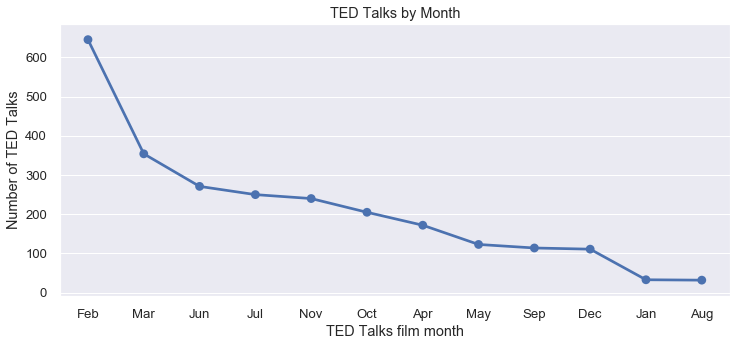

In [369]:
plt.figure(figsize=(12,5))
sns.pointplot(x = ted_talks['film_month'].value_counts().index.str.slice(stop=3), y = ted_talks['film_month'].value_counts().values)
plt.xlabel("TED Talks film month")
plt.ylabel("Number of TED Talks")
plt.title("TED Talks by Month")

Text(0.5, 1.0, 'TED Talks by Month')

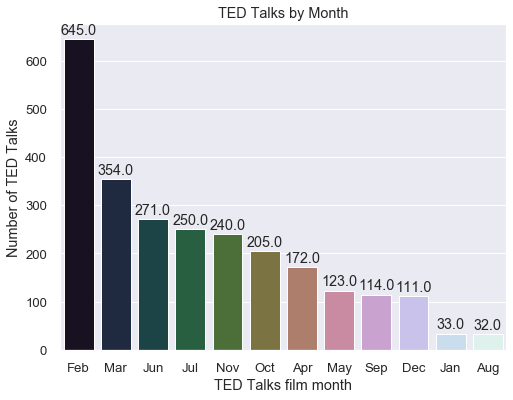

In [376]:
f, ax = plt.subplots(figsize=(8,6))
splot = sns.barplot(x = ted_talks['film_month'].value_counts().index.str.slice(stop=3), 
                       y = ted_talks['film_month'].value_counts().values,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("TED Talks film month")
plt.ylabel("Number of TED Talks")
ax.set_title("TED Talks by Month")


Summary Findings:
 
- February is the most popular month for TED conferenece.
- January and August are the least popular months.

Now we will visualize which days are popular to conduct TED Conferences.

### TED Talks by Day

Text(0.5, 1.0, 'TED Talks by Day')

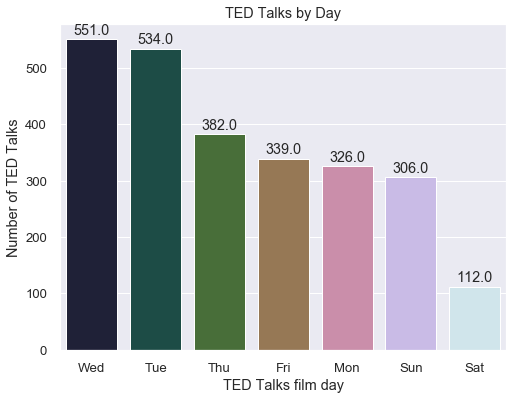

In [377]:
f, ax = plt.subplots(figsize=(8,6))
splot = sns.barplot(x = ted_talks['film_day'].value_counts().index.str.slice(stop=3), 
                       y = ted_talks['film_day'].value_counts().values,palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("TED Talks film day")
plt.ylabel("Number of TED Talks")
ax.set_title("TED Talks by Day")


Summary findings:

- Surprisingly,**Wednesday and Tuesday** are the most popular days for TED conforences instead of weekend.
- Saturdays was being the least popular day.

Now we will analyze which TED events are most popular with respect to number of talks.

### TED Events

Text(0.5, 1.0, 'Top 10 TED events')

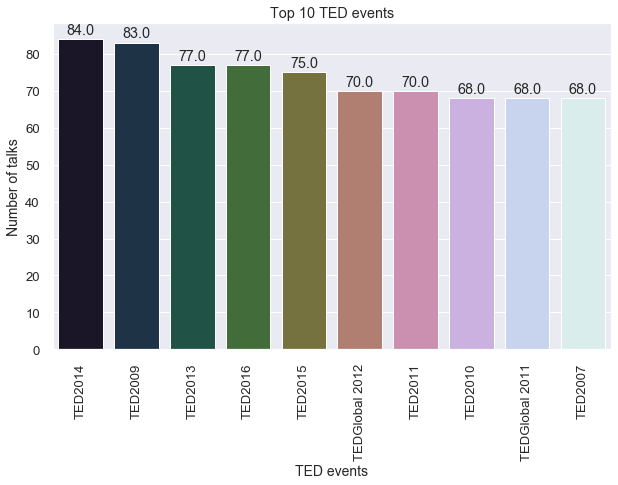

In [451]:
#Top 10 most popular TED Events with respect to number of talks
f, ax = plt.subplots(figsize=(10,6))
splot = sns.barplot(x = ted_talks.groupby('event').count().sort_values('views',ascending = False)['views'].head(10).index, 
                    y = ted_talks.groupby('event').count().sort_values('views',ascending = False)['views'].head(10).values,
                    palette="cubehelix")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("TED events", size=14)
plt.ylabel("Number of talks", size=14)
plt.xticks(rotation = 90)
ax.set_title("Top 10 TED events")

Summary Findings:

- **TED2014** is the most popular TED event with respect to the number of talks and had the 84 talks followed by **TED2009** with 83 talks.

Now we will analyze the TED themes.Even though TED started as Technology,Entertainment and Design,it has combination of every field of study.

### TED Themes

For this first we need to split the tags feature into seperate rows.

In [477]:
df = ted_talks.copy()

In [513]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))


In [514]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [515]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

name                        title  \
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   
0  Ken Robinson: Do schools kill creativity?  Do schools kill creativity?   

                                         description  main_speaker  \
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   
0  Sir Ken Robinson makes an entertaining and pro...  Ken Robinson   

  speaker_occupation                                         transcript  \
0    Author/educator  Good morning. How are you?(Laughter)It's been ...   
0    Author/educator  Good morning. How are you?(Laughter)It's been ...   
0    Author/educator  Good morning. How are you?(Laughter)It's been ...   
0    Author/educator  Good morning. How are you?(Laughter)It's been ...   
0    Author/educator  Good morning. How are you?(Laughter)It's been ...   

   duration   film_date published_date  languages  ...  comments  \
0      19.4  2006-02-24     2006-06-26         60  ...      4553   
0      19.4  2006-02-24     2006-06-26         60  ...      4553   
0      19.4  2006-02-24     2006-06-26         60  ...      4553   
0      19.4  2006-02-24     2006-06-26         60  ...      4553   
0      19.4  2006-02-24     2006-06-26         60  ...      4553   

                                             ratings     views  \
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...  47227110   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...  47227110   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...  47227110   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...  47227110   
0  [{'id': 7, 'name': 'Funny', 'count': 19645}, {...  47227110   

                                       related_talks  \
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
0  [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   

                                                 url film_year film_month  \
0  https://www.ted.com/talks/ken_robinson_says_sc...      2006   February   
0  https://www.ted.com/talks/ken_robinson_says_sc...      2006   February   
0  https://www.ted.com/talks/ken_robinson_says_sc...      2006   February   
0  https://www.ted.com/talks/ken_robinson_says_sc...      2006   February   
0  https://www.ted.com/talks/ken_robinson_says_sc...      2006   February   

   film_day views_per_comment       theme  
0    Friday      10372.745443    children  
0    Friday      10372.745443  creativity  
0    Friday      10372.745443     culture  
0    Friday      10372.745443       dance  
0    Friday      10372.745443   education  

[5 rows x 22 columns]

Text(0.5, 1, 'Top 10 most popular themes')

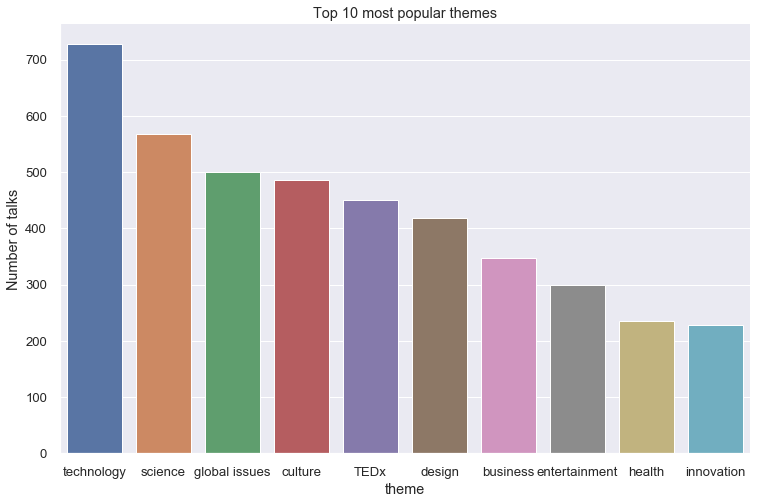

In [520]:
# Top 10 most popular themes
sns.catplot(x = 'theme', kind = 'count', data = theme_df,height = 7,aspect = 1.5,
           order = theme_df.theme.value_counts().iloc[:10].index)
plt.ylabel("Number of talks")
plt.title("Top 10 most popular themes")

Summary findings:

- As expected **Technology is the most popular theme** among 416 different categories of themes.
- **Science** and **global** issues are the next popular themes.
- Even though Design and Entertainment secure the position in top 10 themes but did not secure the second and third place.

### Themes by year

In [549]:
top_themes = theme_df['theme'].value_counts().head(10).index
pop_top_themes = theme_df[(theme_df['theme'].isin(top_themes) & (theme_df['theme']!= 'TEDx'))] 

In [552]:
pop_top_themes = pop_top_themes[(pop_top_themes.film_year >2008)]

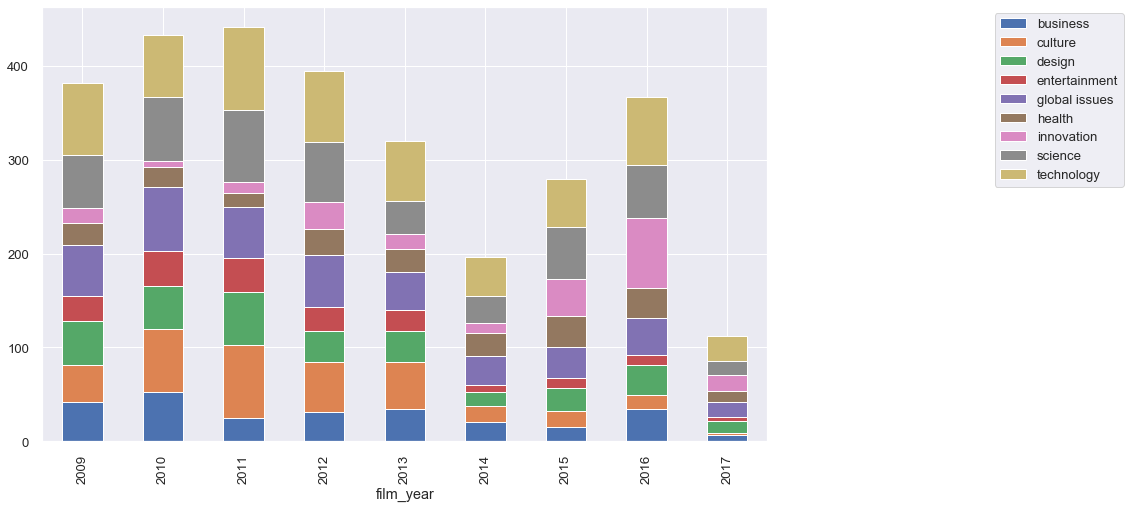

In [584]:
theme_year = pop_top_themes.groupby(['theme', 'film_year']).size().reset_index().pivot(columns='theme', index='film_year', values=0)
theme_year.plot(kind = 'bar',stacked = True,figsize=(13,8))
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1)

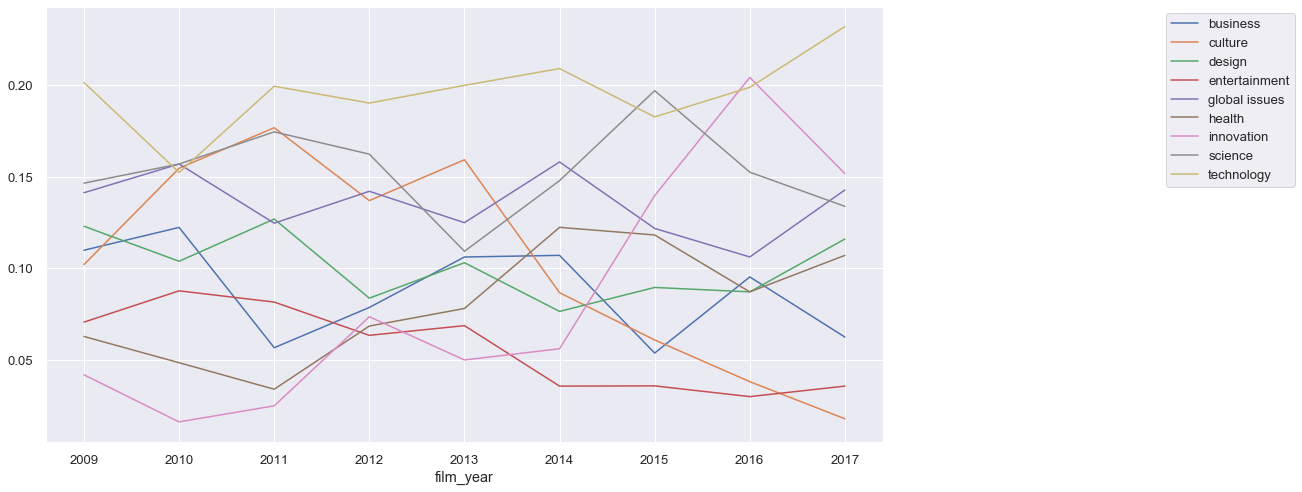

In [591]:
#Proportion of themes yearly
ctab = pd.crosstab(pop_top_themes['film_year'], pop_top_themes['theme']).apply(lambda x: x/x.sum(), axis=1)
ctab.plot(kind = 'line',stacked = False,figsize=(15,8))
plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right', ncol=1)

Summary Findings:

- The proportion of **technology** talks has steadily increased over the years with a slight dip in 2010 and has been the most in 2017.
- Talks on **innovation** has witnessed a very sharp increase in 2015 and overcame the technology talks in 2016.
- Talks on **Heath** also had overcome the technology in 2015.
- Talks on **culture** have witnessed a dip, decreasing steadily starting 2013. The share of culture talks has been the least in 2017.

Now we will analyze if certain themes tend to gather more views than other themes. For this we are going to analyze the top 10 themes.  

Text(0.5, 1.0, 'Top 10 themes with respect to views')

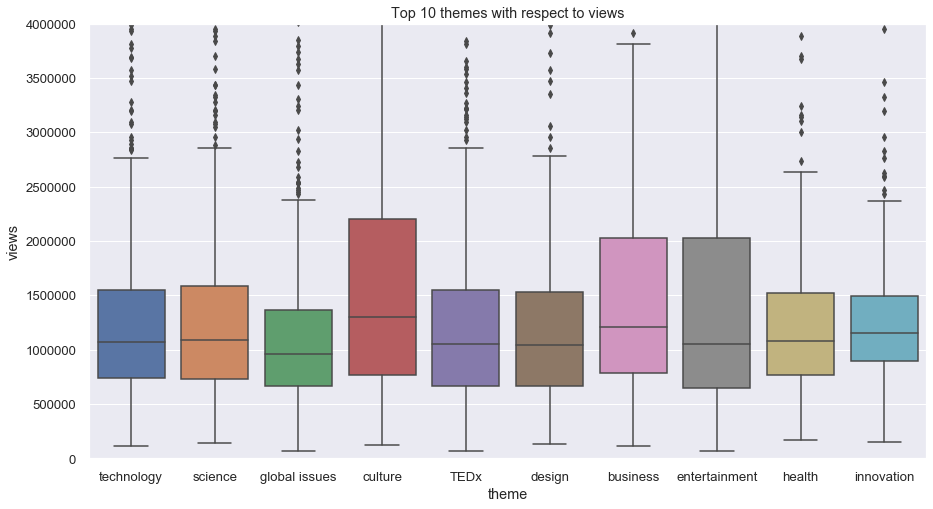

In [596]:
#Number of view with respect to themes
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x = 'theme', y = 'views', data = theme_df, 
            order = theme_df['theme'].value_counts().iloc[:10].index)
ax.set_ylim([0, 0.4e7])
plt.title("Top 10 themes with respect to views")

Observation says that **Culture** has gathered more median number of views followed by **business** and **innovation**.

Now we are going to analyze the TED Talks duration.

### TED Talks Duration

In [597]:
ted_talks.duration.describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

Summary findings:

- Surprisingly, Ted talks are 13.78 minutes long.Although Ted talks have a suggested limit of 18 minutes,some of the talks are as minimum as 2.25 minutes and as maximum as 87.6 minutes long.

Now we will analyze the shortest and longest TED Talks.

In [611]:
#Shortest TED Talk
ted_talks[ted_talks['duration'] == 2.25]

name                     title  \
239  Murray Gell-Mann: The ancestor of language  The ancestor of language   

                                           description      main_speaker  \
239  After speaking at TED2007 on elegance in physi...  Murray Gell-Mann   

    speaker_occupation                                         transcript  \
239          Physicist  Well, I'm involved in other things, besides ph...   

     duration   film_date published_date  languages  ...  comments  \
239      2.25  2007-03-02     2008-06-10         61  ...        76   

                                               ratings   views  \
239  [{'id': 22, 'name': 'Fascinating', 'count': 78...  785293   

                                                  tags  \
239  ['culture', 'global issues', 'history', 'langu...   

                                         related_talks  \
239  [{'id': 161, 'hero': 'https://pe.tedcdn.com/im...   

                                                   url film_year film_month  \
239  https://www.ted.com/talks/murray_gell_mann_on_...      2007      March   

     film_day views_per_comment  
239    Friday      10332.802632  

[1 rows x 22 columns]

In [623]:
#Longest TED Talk
ted_talks[ted_talks['duration'] == 87.6].T

640
name                Douglas Adams: Parrots, the universe and every...
title                            Parrots, the universe and everything
description         Blind river dolphins, reclusive lemurs, a parr...
main_speaker                                            Douglas Adams
speaker_occupation                                   Author, satirist
transcript                                                        NaN
duration                                                         87.6
film_date                                                  2001-05-15
published_date                                             2010-03-16
languages                                                           0
num_speaker                                                         1
event                                        University of California
comments                                                          101
ratings             [{'id': 22, 'name': 'Fascinating', 'count': 29...
views                                                          473220
tags                ['biodiversity', 'biology', 'comedy', 'humor',...
related_talks       [{'id': 635, 'hero': 'https://pe.tedcdn.com/im...
url                 https://www.ted.com/talks/douglas_adams_parrot...
film_year                                                        2001
film_month                                                        May
film_day                                                      Tuesday
views_per_comment                                             4685.35

Summary findings:

- **The ancestor of language** is the shortest TED Talk which was in TED2007 event.
- **Parrots, the universe and everything** is the longest TED Talk and since it was in University of california,we can conclude that it is not a TED Talk.

Now we will analyze the relationship between views and duration to check the length of the talk accumulates the views.We are going to remove the longest talk which is not a TED talk to investigate the relation between views and duration.

The correlation between views and languages is: 0.04874042904795985


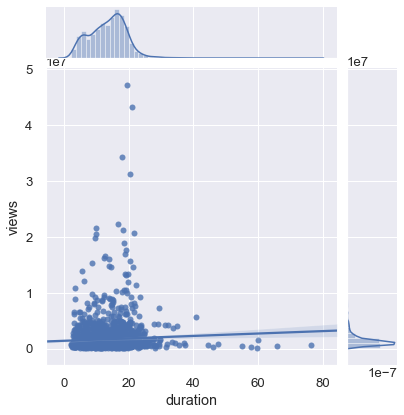

In [626]:
#Relation between number of views and duration
sns.jointplot(x = 'duration',y  ='views',data = ted_talks[ted_talks['duration'] != 87.6],kind = 'reg')
print("The correlation between views and languages is:",ted_talks['duration'].corr(ted_talks['views']))

The above plot tells that **there is no relationship between the length of the talks and its views**.

Now we are going to explore the TED Talks Ratings.For that first we need to unpack the Ratings columns and create new features.

### TED Talks Ratings

In [642]:
ted_talks['ratings'] = ted_talks['ratings'].apply(lambda x: ast.literal_eval(x))

In [708]:
def get_num_ratings(list_of_dict):
    num = 0
    for item in  list_of_dict:
        num+= item['count']
    return num

In [722]:
ted_talks['num_ratings'] = ted_talks['ratings'].apply(get_num_ratings)

In [723]:
ted_talks['num_ratings'].describe()

count     2550.000000
mean      2436.408235
std       4226.795631
min         68.000000
25%        870.750000
50%       1452.500000
75%       2506.750000
max      93850.000000
Name: num_ratings, dtype: float64

Summery findings:

- On average,Ted talks are gettings 2436.41 ratings per each talk.
- The maximum number of rating are 93850 and minimum are 68.

Now lets visualize the top 10 funniest talks of all time.

### Funniest TED Talks

In [769]:
ted_talks['ratings'][0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [758]:
def get_funny_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Funny':
            return d['count']

In [760]:
ted_talks['funny'] = ted_talks['ratings'].apply(get_funny_ratings)

Text(0.5, 1.0, 'Top 10 funniest talks of all time')

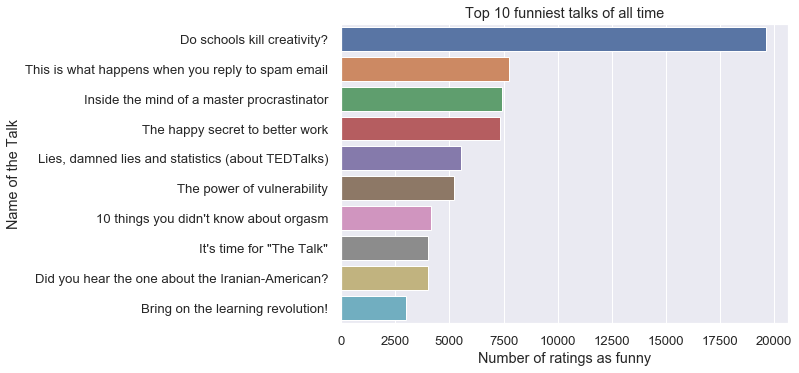

In [761]:
#Top 10 funniest talks of all time
sns.barplot(y = 'title',x = 'funny', data = ted_talks.sort_values('funny',ascending = False).head(10))
plt.xlabel("Number of ratings as funny")
plt.ylabel("Name of the Talk")
plt.title("Top 10 funniest talks of all time")

Summary findings:

- Surprisingly,the most popular talk **Do schools kill creativity?** with respect to views is rated as the top most funniest talks of all times.

Now we are going to analyze the top 10 most beautiful talks of all time.

### Beautiful TED Talks

In [753]:
def get_beautiful_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Beautiful':
            return d['count']

Text(0.5, 1.0, 'Top 10 beautiful talks of all time')

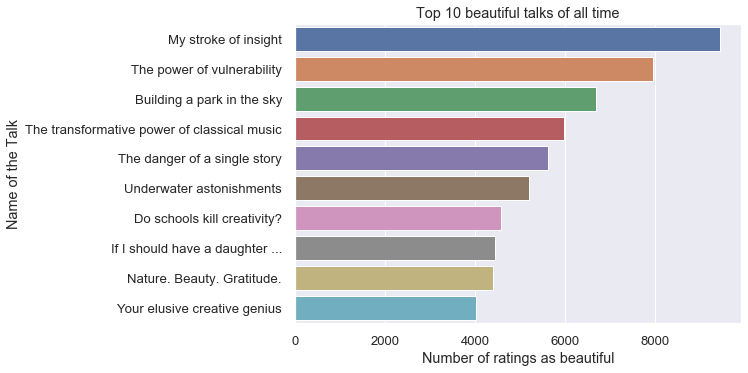

In [757]:
#Top 10 beautiful talks of all time
ted_talks['beautiful'] = ted_talks['ratings'].apply(get_beautiful_ratings)
sns.barplot(y = 'title',x = 'beautiful', data = ted_talks.sort_values('beautiful',ascending = False).head(10))
plt.xlabel("Number of ratings as beautiful")
plt.ylabel("Name of the Talk")
plt.title("Top 10 beautiful talks of all time")

Observation tells that **My stroke of insight** is the most beautiful talks of all time.

Now we will analyze the most inspiring talks of all time.

### Inspiring TED Talks

In [770]:
def get_inspiring_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Inspiring':
            return d['count']

Text(0.5, 1.0, 'Top 10 inspiring talks of all time')

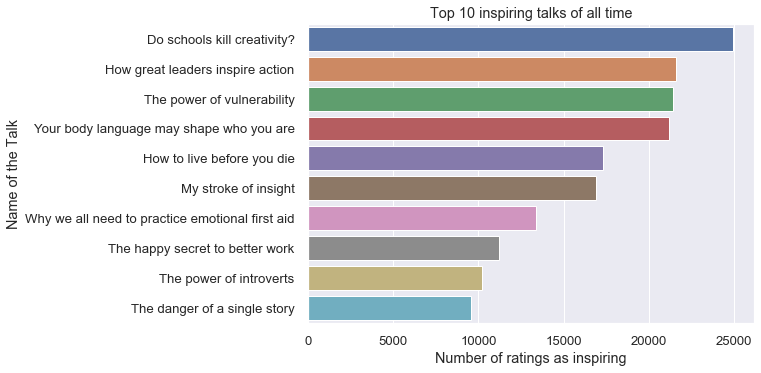

In [771]:
#Top 10 inspiring talks of all time
ted_talks['inspiring'] = ted_talks['ratings'].apply(get_inspiring_ratings)
sns.barplot(y = 'title',x = 'inspiring', data = ted_talks.sort_values('inspiring',ascending = False).head(10))
plt.xlabel("Number of ratings as inspiring")
plt.ylabel("Name of the Talk")
plt.title("Top 10 inspiring talks of all time")

Summary findings:

- The most popular talk **Do schools kill creativity?** with respect to views is rated as the top most inspiring talks of all times.

Now we will investigate most confusing talks of all time.

### Confusing TED Talks

In [772]:
def get_confusing_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Confusing':
            return d['count']

Text(0.5, 1.0, 'Top 10 confusing talks of all time')

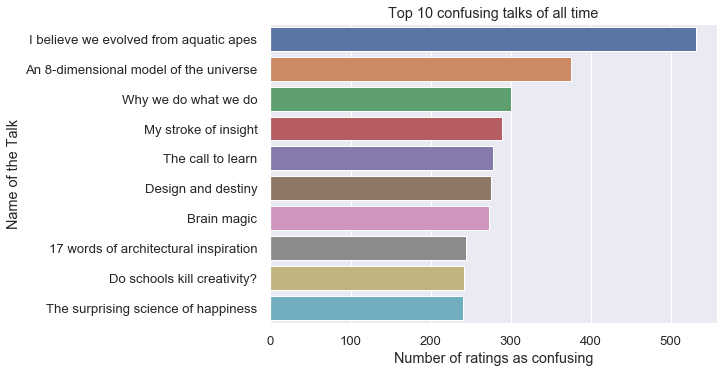

In [773]:
#Top 10 inspiring talks of all time
ted_talks['confusing'] = ted_talks['ratings'].apply(get_confusing_ratings)
sns.barplot(y = 'title',x = 'confusing', data = ted_talks.sort_values('confusing',ascending = False).head(10))
plt.xlabel("Number of ratings as confusing")
plt.ylabel("Name of the Talk")
plt.title("Top 10 confusing talks of all time")

Summary findings:

- **I believe we evolved from aquatic apes** is the most confusing talks of all time.

Now we will analyze the most jaw dropping talks of all times.

### Jaw dropping TED Talks

In [776]:
def get_jaw_dropping_ratings(list_of_dicts):
    for d in list_of_dicts:
        if d['name'] == 'Jaw-dropping':
            return d['count']

Text(0.5, 1.0, 'Top 10 jaw_dropping talks of all time')

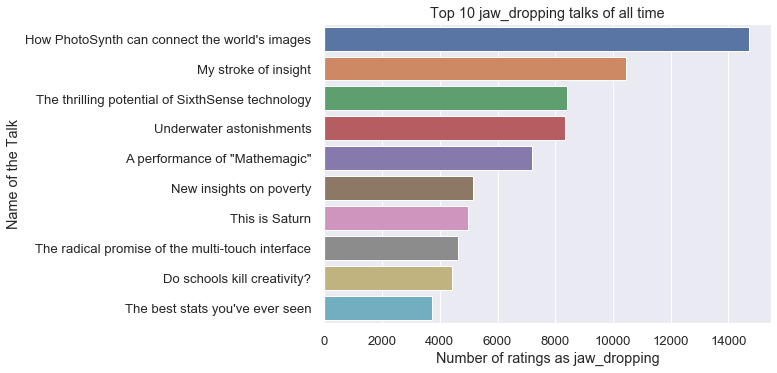

In [777]:
#Top 10 jaw dropping talks of all time
ted_talks['jaw_dropping'] = ted_talks['ratings'].apply(get_jaw_dropping_ratings)
sns.barplot(y = 'title',x = 'jaw_dropping', data = ted_talks.sort_values('jaw_dropping',ascending = False).head(10))
plt.xlabel("Number of ratings as jaw_dropping")
plt.ylabel("Name of the Talk")
plt.title("Top 10 jaw_dropping talks of all time")

Summary findings:

- **How Photosynth can connect the world's images** is the most jaw dropping talks of all time.

Now we are going to visualize what type of rating the most of the TED Talks are getting.

### TED Talks by rating

In [780]:
#get all types of rating keyword
rating_word = dict()
for rating in ted_talks['ratings']:
    for item in rating:
        if item['name'] not in rating_word.keys():
            rating_word[item['name']] = 0
        else:
            rating_word[item['name']] += item['count']

In [781]:
rating_word

{'Funny': 374250,
 'Beautiful': 485776,
 'Ingenious': 378313,
 'Courageous': 416792,
 'Longwinded': 82957,
 'Confusing': 53194,
 'Informative': 880088,
 'Fascinating': 790538,
 'Unconvincing': 134258,
 'Persuasive': 550516,
 'Jaw-dropping': 373108,
 'OK': 205983,
 'Obnoxious': 66094,
 'Inspiring': 1327124}

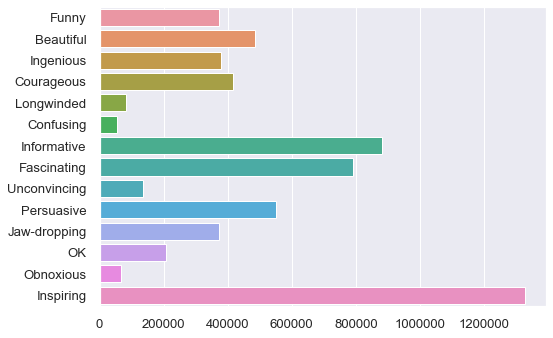

In [788]:
sns.barplot(y = list(rating_word.keys()), x = list(rating_word.values()))

Summary findings:

- Most of the TED Talks are getting **Inspiring** rating.
- **Informative** and **Fascinating** as the secong and third ratings most of the TED Talks are getting.

In [797]:
ted_talks.head().T

0  \
name                        Ken Robinson: Do schools kill creativity?   
title                                     Do schools kill creativity?   
description         Sir Ken Robinson makes an entertaining and pro...   
main_speaker                                             Ken Robinson   
speaker_occupation                                    Author/educator   
transcript          Good morning. How are you?(Laughter)It's been ...   
duration                                                         19.4   
film_date                                                  2006-02-24   
published_date                                             2006-06-26   
languages                                                          60   
num_speaker                                                         1   
event                                                         TED2006   
comments                                                         4553   
ratings             [{'id': 7, 'name': 'Funny', 'count': 19645}, {...   
views                                                        47227110   
tags                ['children', 'creativity', 'culture', 'dance',...   
related_talks       [{'id': 865, 'hero': 'https://pe.tedcdn.com/im...   
url                 https://www.ted.com/talks/ken_robinson_says_sc...   
film_year                                                        2006   
film_month                                                   February   
film_day                                                       Friday   
views_per_comment                                             10372.7   
num_ratings                                                     93850   
funny                                                           19645   
beautiful                                                        4573   
inspiring                                                       24924   
confusing                                                         242   
jaw_dropping                                                     4439   

                                                                    1  \
name                             Al Gore: Averting the climate crisis   
title                                     Averting the climate crisis   
description         With the same humor and humanity he exuded in ...   
main_speaker                                                  Al Gore   
speaker_occupation                                   Climate advocate   
transcript          Thank you so much, Chris. And it's truly a gre...   
duration                                                      16.2833   
film_date                                                  2006-02-24   
published_date                                             2006-06-26   
languages                                                          43   
num_speaker                                                         1   
event                                                         TED2006   
comments                                                          265   
ratings             [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...   
views                                                         3200520   
tags                ['alternative energy', 'cars', 'climate change...   
related_talks       [{'id': 243, 'hero': 'https://pe.tedcdn.com/im...   
url                 https://www.ted.com/talks/al_gore_on_averting_...   
film_year                                                        2006   
film_month                                                   February   
film_day                                                       Friday   
views_per_comment                                             12077.4   
num_ratings                                                      2936   
funny                                                             544   
beautiful                                                          58   
inspiring                                           